In [1]:
using DiffEqBayes
using Distributions
using DifferentialEquations
using Plots

[Turing]: AD chunk size is set as 40


In [2]:
gr(fmt=:png)

Plots.GRBackend()

In [3]:
g1 = @ode_def_bare LorenzExample begin
  dx = σ*(y-x)
  dy = x*(ρ-z) - y
  dz = x*y - β*z
end σ=>10.0 ρ=>28.0 β=>2.66 

(::LorenzExample) (generic function with 8 methods)

In [4]:
r0 = [1.0; 0.0; 0.0]                
tspan = (0.0, 30.0)                 

(0.0, 30.0)

In [6]:
prob = ODEProblem(g1,r0,tspan)
@time sol = solve(prob,Tsit5())

  6.591385 seconds (4.00 M allocations: 226.614 MiB, 4.26% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 357-element Array{Float64,1}:
  0.0        
  3.56786e-5 
  0.000392465
  0.00326234 
  0.00905769 
  0.0169556  
  0.0276884  
  0.0418539  
  0.0602369  
  0.0836807  
  0.113359   
  0.148617   
  0.187037   
  ⋮          
 29.2024     
 29.2868     
 29.3682     
 29.4377     
 29.5106     
 29.5789     
 29.659      
 29.7275     
 29.8105     
 29.907      
 29.9937     
 30.0        
u: 357-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                    
 [0.999643, 0.000998805, 1.78143e-8]
 [0.996105, 0.0109654, 2.14696e-6]  
 [0.96936, 0.0897687, 0.000143797]  
 [0.924207, 0.242279, 0.0010461]    
 [0.880049, 0.438715, 0.00342406]   
 [0.848333, 0.691528, 0.0084873]    
 [0.8495, 1.01449, 0.0182119]       
 [0.913889, 1.44248, 0.0366944]     
 [1.08882, 2.05219, 0.074029]       
 [1.46076, 3.02043, 0.160047]       
 [2.1626, 4.63308, 0.37716]         
 [3.36836, 7.26747, 0.93653]        
 ⋮   

In [7]:
t = collect(linspace(1,30,30))
sig = 0.49 
data = convert(Array, VectorOfArray([(sol(t[i]) + sig*randn(3)) for i in 1:length(t)]))

3×30 Array{Float64,2}:
 -9.08427  -7.78267  -8.80232  -10.3167   …  -9.14173  -2.68485  -13.0645
 -9.57267  -8.58811  -7.27459   -9.54867     -5.89408  -4.44709  -18.928 
 28.7088   24.888    27.8365    26.2916      33.5354   17.2699    27.5221


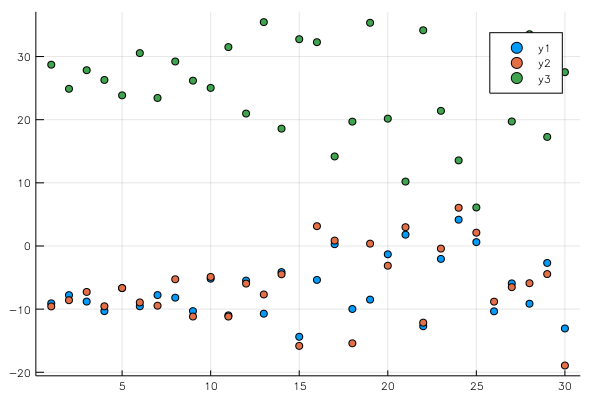

In [8]:
Plots.scatter(t, data[1,:])
Plots.scatter!(t, data[2,:])
Plots.scatter!(t, data[3,:])

In [9]:
priors = [Truncated(Normal(10,0.01),0,15),Truncated(Normal(28,0.01),0,45),Truncated(Normal(2.66,0.01),0,4)]

3-element Array{Distributions.Truncated{Distributions.Normal{Float64},Distributions.Continuous},1}:
 Truncated(Distributions.Normal{Float64}(μ=10.0, σ=0.01), range=(0.0, 15.0))
 Truncated(Distributions.Normal{Float64}(μ=28.0, σ=0.01), range=(0.0, 45.0))
 Truncated(Distributions.Normal{Float64}(μ=2.66, σ=0.01), range=(0.0, 4.0)) 

In [10]:
@time bayesian_result = stan_inference(prob,t,data,priors;num_samples=100,num_warmup=500,vars =(StanODEData(),InverseGamma(3,2)))


File /home/vaibhav/DiffEqBayes.jl/notebook/tmp/parameter_estimation_model.stan will be updated.



--- Translating Stan model to C++ code ---
bin/stanc  /home/vaibhav/DiffEqBayes.jl/notebook/tmp/parameter_estimation_model.stan --o=/home/vaibhav/DiffEqBayes.jl/notebook/tmp/parameter_estimation_model.hpp
Model name=parameter_estimation_model_model
Input file=/home/vaibhav/DiffEqBayes.jl/notebook/tmp/parameter_estimation_model.stan
Output file=/home/vaibhav/DiffEqBayes.jl/notebook/tmp/parameter_estimation_model.hpp

--- Linking C++ model ---
g++ -I src -I stan/src -isystem stan/lib/stan_math/ -isystem stan/lib/stan_math/lib/eigen_3.3.3 -isystem stan/lib/stan_math/lib/boost_1.62.0 -isystem stan/lib/stan_math/lib/cvodes_2.9.0/include -Wall -DEIGEN_NO_DEBUG  -DBOOST_RESULT_OF_USE_TR1 -DBOOST_NO_DECLTYPE -DBOOST_DISABLE_ASSERTS -DFUSION_MAX_VECTOR_SIZE=12 -DNO_FPRINTF_OUTPUT -pipe   -lpthread  -O3 -o /home/vaibhav/DiffEqBayes.jl/notebook/tmp/parameter_estimation_model src/cmdstan/main.cpp -i

DiffEqBayes.StanModel{Int64,Mamba.Chains}(0, Object of type "Mamba.Chains"

Iterations = 1:100
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 100

[-76685.8 0.987734 … 25.6621 2.90306; -76686.0 0.812381 … 25.6621 2.90306; … ; -76688.3 0.986834 … 25.6621 2.90308; -76687.4 0.903043 … 25.6621 2.90308]

[-113770.0 0.999912 … 24.5403 0.900252; -113772.0 0.250084 … 24.5404 0.90025; … ; -113666.0 0.0775505 … 24.5432 0.900298; -113667.0 0.461243 … 24.5432 0.900297]

[-12458.5 0.76849 … 26.599 3.09893; -12458.6 0.957147 … 26.599 3.09893; … ; -12458.6 0.902795 … 26.599 3.09894; -12459.4 0.577168 … 26.599 3.09894]

[-125720.0 0.801624 … 23.4413 2.34883; -125720.0 0.366504 … 23.4413 2.34883; … ; -125714.0 0.901436 … 23.4412 2.34884; -125714.0 0.99994 … 23.4412 2.34884])

In [11]:
Mamba.describe(bayesian_result.chain_results)

Iterations = 1:100
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 100

Empirical Posterior Estimates:
                    Mean                SD                 Naive SE                MCSE              ESS    
         lp__ -8.21449002×10⁴          4.4161118×10⁴ 2208.055901434497173         2.54645407×10⁴   3.0075193
accept_stat__ 7.47863642×10⁻¹        2.41719537×10⁻¹    0.012085976851424      5.4363575188×10⁻²  19.7700372
   stepsize__  1.0407065×10⁻⁶ 8.477552951550395×10⁻⁷    0.000000042387765 4.888395503169556×10⁻⁷   3.0075188
  treedepth__   9.9950000×10⁰         1.0000000×10⁻¹    0.005000000000000         5.0000000×10⁻³ 100.0000000
 n_leapfrog__   1.0210800×10³          3.8400000×10¹    1.920000000000000          1.9200000×10⁰ 100.0000000
  divergent__               0                      0    0.000000000000000                      0         NaN
     energy__  8.21481267×10⁴         4.41613144×10⁴ 2208.065717842922822         2.54646539×10⁴   3.0075193
     sigma1.1 

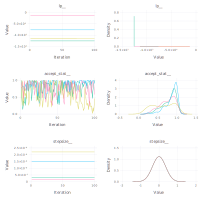

Press ENTER to draw next plot
STDIN> 


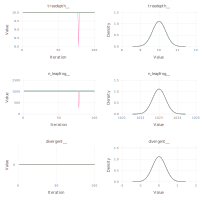

Press ENTER to draw next plot
STDIN> 


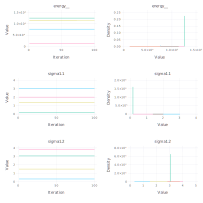

STDIN> 


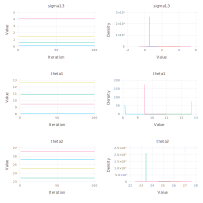

Press ENTER to draw next plot
Press ENTER to draw next plot
STDIN> 


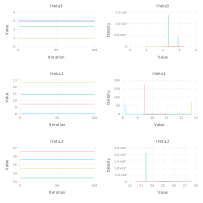

Press ENTER to draw next plot
STDIN> 


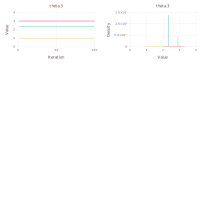

In [12]:
plot_chain(bayesian_result)